In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
class Color:
    BLACK = "\033[30m"
    RED = "\033[31m"
    GREEN = "\033[32m"
    YELLOW = "\033[33m"
    BLUE = "\033[34m"
    MAGENTA = "\033[35m"
    CYAN = "\033[36m"
    WHITE = "\033[37m"
    RESET = "\033[0m"

c = Color()

In [56]:
def launchProgram():
    print(f"{c.CYAN}+++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"{c.CYAN}+              SPAM OR HAM PROJECT                  +")
    print(f"{c.CYAN}+       AML2203 Midterm Project - Group 3           +")
    print(f"{c.CYAN}+++++++++++++++++++++++++++++++++++++++++++++++++++++{c.RESET}\n")

launchProgram()

+++++++++++++++++++++++++++++++++++++++++++++++++++++
+              SPAM OR HAM PROJECT                  +
+       AML2203 Midterm Project - Group 3           +
+++++++++++++++++++++++++++++++++++++++++++++++++++++



In [57]:
# Load the dataset
df = pd.read_csv("spam_dataset.csv")
print(f"{c.GREEN} Count of Dataset: {c.RESET}\n {df.count()}\n") # Displays the count of records available for a particular field
print(f"{c.GREEN} Info of Dataset: {c.RESET}\n {df.info()}\n") # Displays the information on the data set includes the index number, column name, non-null columns and data type
###To be checked on why the label is displayed at the bottom of the result of df.info()
print(f"{c.GREEN} Data Frame Shape: {c.RESET}\n {df.shape}\n") # Displays the dimension of the data which is 5171 rows and 4 columns
print(f"{c.GREEN} Preview of Dataset: {c.RESET}") # Displays a preview of the dataset
df.head()

 Count of Dataset: 
 id           5171
label        5171
text         5171
label_num    5171
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5171 non-null   int64 
 1   label      5171 non-null   object
 2   text       5171 non-null   object
 3   label_num  5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
 Info of Dataset: 
 None

 Data Frame Shape: 
 (5171, 4)

 Preview of Dataset: 


,id,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


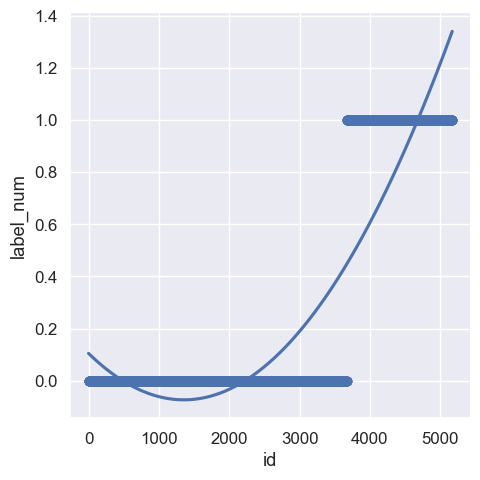

In [58]:
#plotting the Scatter plot to check relationship between label and text
sns.lmplot(x ="id", y ="label_num", data = df, order = 2, ci = None)

In [59]:
# Convert the text column into numerical features using the bag-of-words model
vectorizer = CountVectorizer() # Creates an instance of the CountVectorizer class, a tool for converting a collection of text documents into a matrix of token counts
X = vectorizer.fit_transform(df["text"]) # Fits the CountVectorizer to the text data in the "text" column of the df DataFrame and transforms the text data into a sparse matrix of word counts, which is assigned to the variable X

The bag of words model is a way of representing text data in a numerical format for use in machine learning and natural language processing (NLP) tasks. In this model, a piece of text is represented as a bag (or multiset) of its constituent words, with each word treated as a discrete entity.

To create a bag of words representation, the text is first preprocessed to remove punctuation and other irrelevant symbols, and to convert all words to lowercase. Then, each unique word in the text is assigned a numerical index. Finally, for each piece of text, a vector is created where each element corresponds to the count of the corresponding word in the text. The resulting vector is known as the bag of words representation of the text.

The bag of words model is a simple and efficient way of representing text data, but it has limitations. It does not take into account the context in which the words appear or their semantic meaning, and it treats each word as independent of the others, which can result in a loss of information. However, it is still widely used in NLP tasks such as text classification, sentiment analysis, and information retrieval.

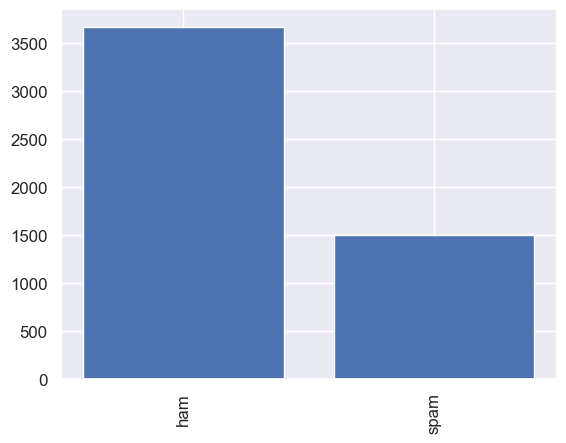

In [60]:
# Extract the text field from the DataFrame into a list
label_count = df['label']  # select first 30 records

# Create a CountVectorizer object and fit it on the list of text data
vectorizer = CountVectorizer()
X_label = vectorizer.fit_transform(label_count)

# Get the feature names and their frequencies
features = vectorizer.get_feature_names_out()
frequencies = X_label.sum(axis=0).A1

dictionary = dict(zip(features, frequencies))

# Sort the dictionary in descending order of frequency
sorted_dict = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}

# Plot the chart
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation=90)
plt.show()




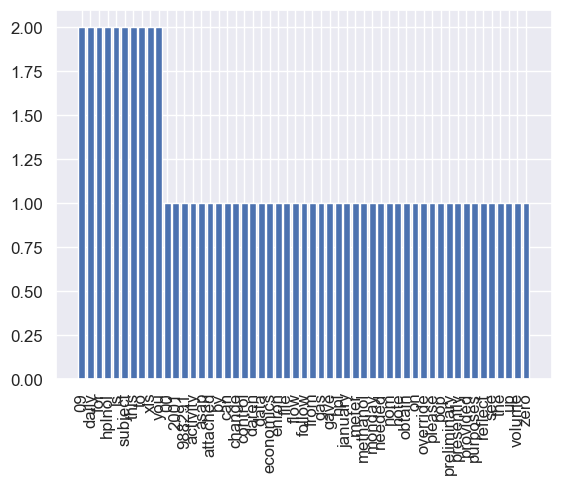

In [61]:
# Extract the text field from the DataFrame into a list
text_count = df['text'][:2].tolist()  # select first 2 records

# Create a CountVectorizer object and fit it on the list of text data
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(text_count)

# Get the feature names and their frequencies
features = vectorizer.get_feature_names_out()
frequencies = X_text.sum(axis=0).A1

dictionary = dict(zip(features, frequencies))

# Sort the dictionary in descending order of frequency
sorted_dict = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}

# Plot the chart
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation=90)
plt.show()

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df["label"], test_size=0.2)

This line uses the train_test_split function from scikit-learn to split the data into training and testing sets. The X matrix contains the input data, while df["label"] contains the corresponding labels for each sample in X. The test_size parameter specifies the proportion of the data that should be used for testing (in this case, 20%). The train_test_split function shuffles the data and splits it into two sets: one for training and one for testing.

The resulting output consists of four arrays:

X_train: The input data for the training set
X_test: The input data for the testing set
y_train: The corresponding labels for the training set
y_test: The corresponding labels for the testing set

In [63]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [64]:
# Predict the label of the test data
y_pred = model.predict(X_test)

In [65]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{c.GREEN} ***Accuracy: {c.RESET} {accuracy}\n")

 ***Accuracy:  0.9806763285024155



In [66]:
# Evaluate the precision score
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{c.GREEN} ***Precision Score (Macro): {c.RESET} {precision_macro}\n")
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{c.GREEN} ***Precision score (Weighted): {c.RESET} {precision_weighted}\n")

 ***Precision Score (Macro):  0.9792359494512803

 ***Precision score (Weighted):  0.9806381727659617



Both macro and weighted are options for computing the average precision score for multi-class classification problems. The difference between these two options lies in how they handle class imbalance.

Macro: Computes the precision for each class independently and then takes the average of these scores, giving equal weight to each class. This means that the precision for each class is given the same importance, regardless of the number of samples in each class.

Weighted: Computes the average precision score, weighted by the number of samples in each class. This means that the precision score is higher when there are more samples in a class, and lower when there are fewer samples in a class. The precision score is weighted based on the number of samples in each class, so it gives more importance to classes with more samples.

In other words, macro is suitable for use when you want to give equal weight to each class, regardless of the number of samples in each class. weighted is suitable when you want to account for class imbalance and give more weight to classes with more samples.


In [67]:
def evalModel(model, X_train, X_test, y_train, y_test, y_pred): # This method evaluate the Logistic Regression model and provide clasification report, confusion matrix and precision score

    print(f"{c.GREEN}***Score: {c.RESET} {model.score(X_test, y_test)}\n")

    # Classification Report without cross-validation
    # For reference on classification matrix https://www.simplilearn.com/tutorials/machine-learning-tutorial/confusion-matrix-machine-learning#:~:text=A%20confusion%20matrix%20presents%20a,actual%20values%20of%20a%20classifier.
    print(f"{c.GREEN}***Classification Report*** {c.RESET}")
    print(classification_report(y_test, y_pred))

evalModel(model, X_train, X_test, y_train, y_test, y_pred) #This method generates the Classification Report

***Score:  0.9806763285024155

***Classification Report*** 
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       738
        spam       0.98      0.96      0.97       297

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.98      1035
weighted avg       0.98      0.98      0.98      1035



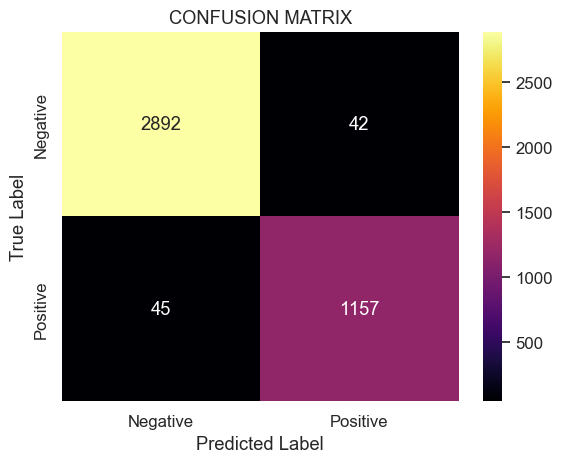

In [68]:
# Generates the predicted labels using cross-validation
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

# Generates the Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)

# Creates the heatmap using Seaborn
sns.set(font_scale=1.1)
sns.heatmap(cm, annot=True, fmt='g', cmap='inferno', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# set the axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CONFUSION MATRIX")

# show the plot
plt.show()
